In [18]:
from random import random as rnd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [169]:
#f(x, y) = (x - a) ^ 2 + (y - b) ^ 2 = r ^ 2
#partial df/dx

point = np.array([5, 5]) #actual value we're trying to discern
sat = [] #position of satellites
dis = [] #distances from satellites to point, with some error
for i in range(5):
    p = np.array([rnd() * 10, rnd() * 10])
    #p = np.array([1 + (i & 2) * 4, 1 + (i & 1) * 8])
    d = np.linalg.norm(point - p) * (1 + 0.1 - rnd() * 0.2)
    sat.append(p)
    dis.append(d)
    
#residuals
def residuals(p, sat, dis):
    errs = []
    for i in range(len(sat)):
        #distance from satellite to estimate ^ 2 - func(sat) ^ 2
        errs.append(np.linalg.norm(sat[i] - p) ** 2 - dis[i] ** 2)
    return np.array(errs)

#partial derivatives - generates jacobian matrix
def differentials(p, sat, dis):
    rows = []
    for i in range(len(sat)):
        rows.append([2 * (p[0] - sat[i][0]), 2 * (p[1] - sat[i][1])])
    return np.array(rows)

In [170]:
#compute weighted average of the satellites
#this serves as the initial guess
avg = np.array([0.0, 0.0])
for i in range(len(sat)):
    avg += sat[i] / dis[i]

w_avg = avg / sum(np.reciprocal(dis))
print ('initial guess:', w_avg)

initial guess: [ 4.96921953  7.83623048]


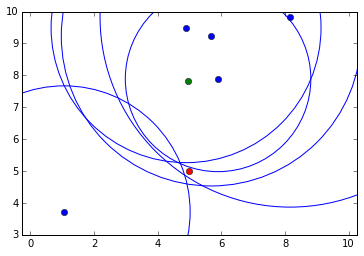

In [171]:
plt.plot(*zip(*sat), marker='o', color='b', ls='')
plt.plot([point[0]], [point[1]], marker='o', color='r', ls='')
plt.plot([w_avg[0]], [w_avg[1]], marker='o', color='g', ls='')
plt.axes().set_aspect('equal', 'datalim')

for i in range(len(sat)):
    circle = plt.Circle(sat[i], dis[i], color='b', fill=False)
    plt.gca().add_artist(circle)

In [172]:
guess = w_avg
for i in range(15):
    jacobian = differentials(guess, sat, dis)
    resids = residuals(guess, sat, dis)
    
    #print(jacobian)
    inv_j = np.linalg.pinv(jacobian)
    delta = np.dot(inv_j, resids)
    
    next_guess = guess - delta
    
    print ('delta:', delta, 'next guess:', next_guess)
    
    if (delta[0] < 1e-12 and delta[1] < 1e-12):
        print('colverged in', i+1, 'steps')
        break
    
    guess = next_guess

delta: [ 0.32284429  2.90133522] next guess: [ 4.64637523  4.93489526]
delta: [-0.07672757 -0.05697449] next guess: [ 4.72310281  4.99186975]
colverged in 2 steps


In [164]:
plsq,cov,infodict,mesg,ier = optimize.leastsq(residuals, w_avg, args=(sat, dis), Dfun=differentials, col_deriv=False, full_output=True)
print (plsq, mesg)
print ('error:', (plsq - point)) 

[ 5.15239766  5.03315483] Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
error: [ 0.15239766  0.03315483]
